## M04W01 - Exercises

**(Linear Regression)**

Given one dataset of advertising methods, costs associated with each method, and final sales volumn for each data row. Try to explore the data set and use Linear Regression to predict the sales.

*-- Exercise provided by AIO2024, whyfor13 try to solve it on 04/10/2024 --*

**Exercise 1** (read and process data from file csv): Complete the function prepare_data(file_name_dataset) with X is input and y is output.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [data[x][index] for x in range(len(data))]
    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset , delimiter =',', skip_header =1).tolist()
    N = len(data)

    # get tv (index = 0)
    tv_data = get_column(data, 0)

    # get radio (index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)
    
    # get sales (index = 3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X,y

In [107]:
# Multiple choice question 1
X,y = prepare_data (r'data/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

# My answer is A

[624.1, 175.1, 300.5, 78.9]


**Exercise 2:**  
Training data using one sample - linear regression with loss is calculated by formula Mean Squared Error L = (y^ - y)^2

In [108]:
""" Below is a function to initialize params randomly. To answer multiple choice questions, 
we will use fixed params provided from the exercises.

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b  = 0
    return w1, w2, w3, b
"""

def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283, 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

In [109]:
# Multiple choice question 2:
O = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5 , w3=0, b=0.5)
print(O)

# My answer is A

1.0


In [110]:
def compute_loss(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss


# Multiple choice question 3:
l = compute_loss(y_hat=1, y=0.5)
print(l)

# My answer is A

0.25


In [111]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db


# Multiple question 4: My answer is A
# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0 , y_hat=0.5)
print('Derivative of Loss with respect to wi is:', g_wi)

# Multiple question 5: My answer is B:
g_b = compute_gradient_b(y=2.0 ,y_hat =0.5)
print('Derivative of Loss with respect to b is:', g_b)

Derivative of Loss with respect to wi is: -1.0
Derivative of Loss with respect to b is: -3.0


In [112]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - (lr * dl_dwi)
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - (lr * dl_db)
    return b

# Multiple question 6: My answer is A
after_wi = update_weight_wi(wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print(after_wi)

# Multiple question 7: My answer is A
after_b = update_weight_b(b=0.5 , dl_db = -1.0 , lr = 1e-5)
print(after_b)

1.000005
0.50001


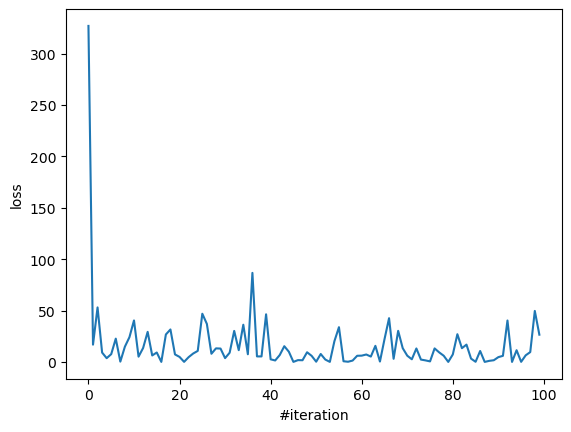

In [113]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db  = compute_gradient_b(y, y_hat)

            #update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b  = update_weight_b(b, dl_db, lr)

            #logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)


(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression (X,y)
plt.plot(losses[:100])
plt.ylabel("loss")
plt.xlabel('#iteration')
plt.show()

In [114]:
# Multiple choice question 8: My answer is A
X,y = prepare_data(r'data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
print(w1 , w2 , w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [115]:
# Multiple choice question 9: My answer is B
tv = 19.2
radio = 35.9
newspaper = 51.3
X,y = prepare_data(r'data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max =50 , lr =1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


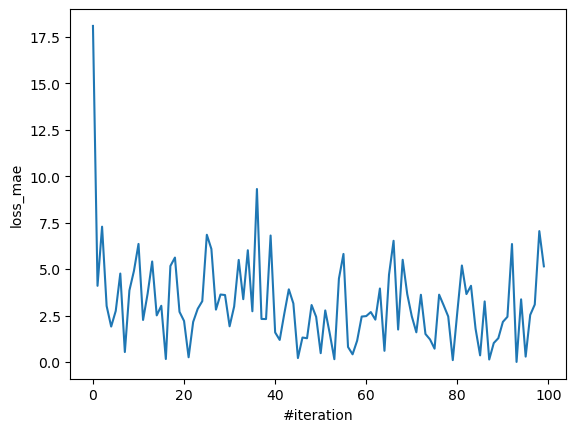

In [11]:
# MAE replace loss function above with MAE loss:
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

def implement_linear_regression_mae(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses_mae = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db  = compute_gradient_b(y, y_hat)
            
            #update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b  = update_weight_b(b, dl_db, lr)

            #logging
            losses_mae.append(loss)
    return (w1, w2, w3, b, losses_mae)


(w1 ,w2 ,w3 ,b, losses_mae) = implement_linear_regression_mae(X,y)
plt.plot(losses_mae[:100])
plt.ylabel("loss_mae")
plt.xlabel('#iteration')
plt.show()

In [12]:
# Multiple choice question 10: My answer is A
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

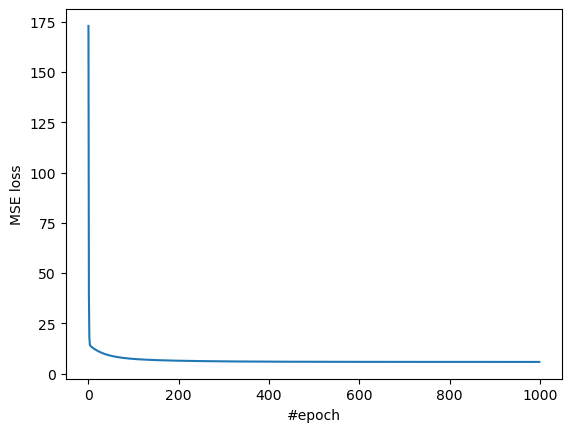

In [17]:
def implement_linear_regression_nsample(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y, y_hat)

            #accumulate loss
            loss_total += loss

            #compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            #accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
        
        # update parameters - after processing N samples
        w1 = w1 - lr * (dw1_total/N)
        w2 = w2 - lr * (dw2_total/N)
        w3 = w3 - lr * (dw3_total/N)
        b = b - lr * (db_total/N)

        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)


(w1, w2, w3, b, losses) = implement_linear_regression_nsample(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE loss')
plt.show()

In [26]:
# Multiple choice question 11 - no correct answer

X,y = prepare_data(r'data/advertising.csv')
# using MSE loss
(w1,w2,w3,b,losses) = implement_linear_regression_nsample(X,y,epoch_max=50,lr=1e-5)
print(w1, w2, w3)

0.0777391352775665 0.05644769904625777 0.04135488482198375


0.06710990754044266 0.15756173831487585 0.029619799386084403
[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637

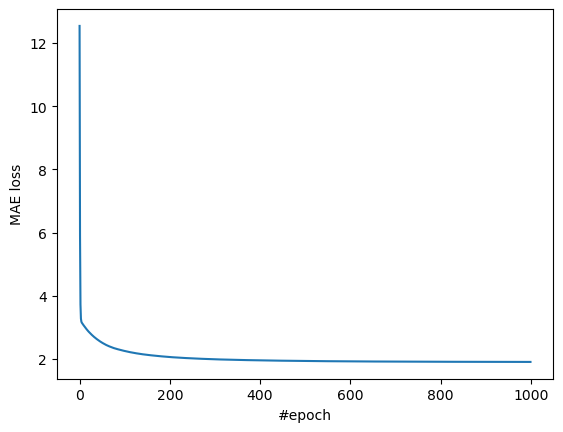

In [116]:
def implement_linear_regression_nsample_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            #accumulate loss
            loss_total += loss

            #compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            #accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
        
        # update parameters - after processing N samples
        w1 = w1 - lr * (dw1_total/N)
        w2 = w2 - lr * (dw2_total/N)
        w3 = w3 - lr * (dw3_total/N)
        b = b - lr * (db_total/N)

        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)


(w1, w2, w3, b, losses) = implement_linear_regression_nsample_mae(X, y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MAE loss')
plt.show()

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


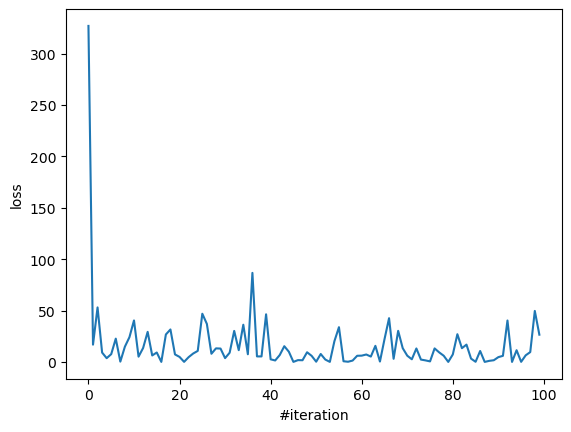

In [104]:
# Exercise 4:

def prepare_data(file_name_dataset) :
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header =1).tolist()

    # get tv (index =0)
    tv_data = get_column(data, 0)

    # get radio (index =1)
    radio_data = get_column(data, 1)

    # get newspaper (index =2)
    newspaper_data = get_column(data, 2)

    # get sales (index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1 , x1 , x2 , x3 ] for x1 , x2 , x3 in zip(tv_data , radio_data , newspaper_data)]
    y = sales_data
    return X , y

#"""
def initialize_params() :
    bias = 0
    w1 = random.gauss(mu =0.0 , sigma =0.01)
    w2 = random.gauss(mu =0.0 , sigma =0.01)
    w3 = random.gauss(mu =0.0 , sigma =0.01)

    # comment this line for real application
    #return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    return [0, 0.016992259082509283, 0.0070783670518262355 , -0.002307860847821344]
#"""

# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weights):
    result = np.dot(np.array(X_features), np.array(weights))
    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_w(features, y, y_hat):
    dl_dweights = [(features[i]*2*(y_hat - y)) for i in range(len(features))]
    return dl_dweights

# update weights
def update_weight(weights, dl_weights, lr):
    weights = [(weights[i] - lr*dl_weights[i]) for i in range(len(weights))]
    return weights

def implement_linear_regression(X_features, y_output, epoch_max = 50, lr = 1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        print('epoch', epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_features[i]
            y = y_output[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            #update parameters
            weights = update_weight(weights, dl_dweights, lr)

            #logging
            losses.append(loss)
    return (weights, losses)


X,y = prepare_data(r'data/advertising.csv')
W, L = implement_linear_regression(X,y)
plt.plot(L[:100])
plt.ylabel("loss")
plt.xlabel('#iteration')
plt.show()

In [105]:
# Multiple choice question 12: My answer is A
print(L[9999])

31.338878034644296
